In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
df=df.drop(labels=['id'],axis=1)

In [5]:
X = df.drop(labels=['price'],axis=1)
Y = df[['price']]

In [6]:
Y

,price
0,13619
1,13387
2,2772
3,666
4,14453
...,...
193568,1130
193569,2874
193570,3036
193571,681


In [7]:
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

In [8]:
numerical_cols

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [9]:
categorical_cols

Index(['cut', 'color', 'clarity'], dtype='object')

In [10]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [11]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [12]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

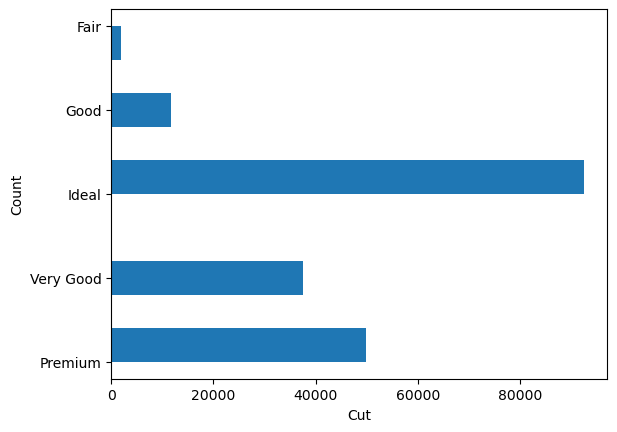

In [14]:
plt.hist(df['cut'],orientation='horizontal')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.show()

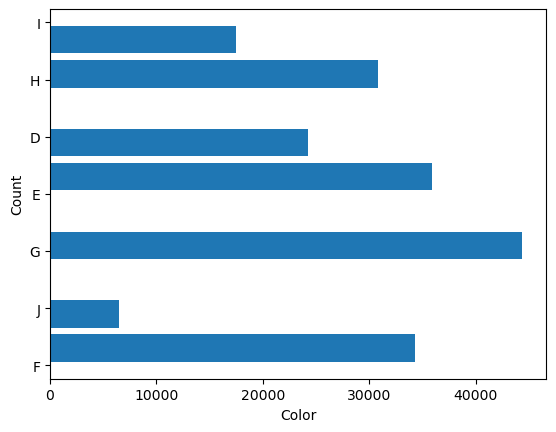

In [15]:
plt.hist(df['color'],rwidth=0.8,orientation='horizontal')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

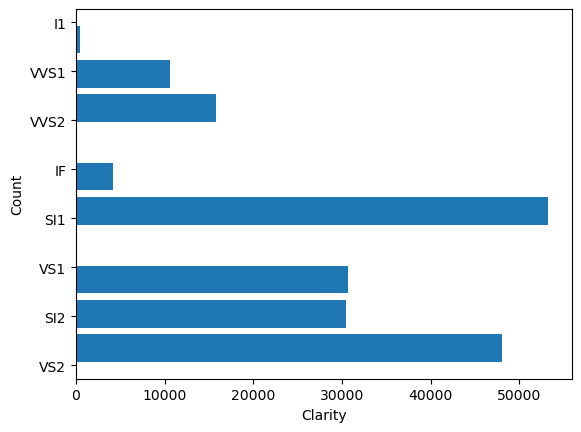

In [16]:
plt.hist(df['clarity'],rwidth=0.8,orientation='horizontal')
plt.xlabel('Clarity')
plt.ylabel('Count')
plt.show()

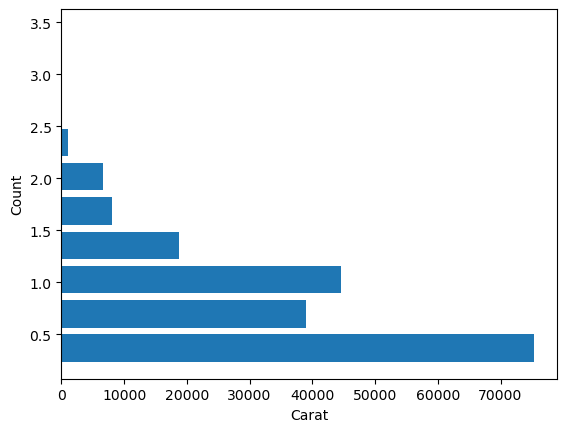

In [17]:
plt.hist(df['carat'],rwidth=0.8,orientation='horizontal')
plt.xlabel('Carat')
plt.ylabel('Count')
plt.show()

In [18]:
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [19]:
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder 

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [21]:
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories]))
    ]

)

In [22]:
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [23]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30,random_state=10)

In [24]:
xtrain=pd.DataFrame(preprocessor.fit_transform(xtrain),
                     columns=preprocessor.get_feature_names_out())

In [25]:
xtest=pd.DataFrame(preprocessor.transform(xtest),
                    columns=preprocessor.get_feature_names_out())

In [26]:
xtrain.head()

,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-0.780167,0.719352,-0.637086,-0.843944,-0.808252,-0.760667,2.0,0.0,4.0
1,1.793874,-1.307964,0.403474,1.681406,1.751577,1.530872,3.0,3.0,3.0
2,-0.758536,-1.584416,0.403474,-0.690619,-0.762865,-0.833184,3.0,0.0,4.0
3,0.063426,-0.478607,-0.637086,0.301483,0.281037,0.254572,4.0,3.0,1.0
4,-0.563861,0.627201,-0.637086,-0.483179,-0.508697,-0.441592,4.0,3.0,6.0


In [27]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [28]:
regression=LinearRegression()
regression.fit(xtrain,ytrain)

LinearRegression()

In [29]:
regression.coef_

array([[ 6440.66932618,  -132.51375221,   -67.07538923, -2026.48028881,
         -163.1836616 ,  -102.79649896,    69.86048841,  -287.53734176,
          433.49841543]])

In [30]:
regression.intercept_

array([3182.71041046])

In [31]:
slopes=regression.coef_[0]
inter=regression.intercept_[0]
# print(var)
idx=0
ans=0
for i in xtest.iloc[10,:]:
    ans+=(i*slopes[idx])
    idx+=1
ans=ans+inter
print(f"actual : {ytest.iloc[10,:][0]} \npredicted : {ans}")

actual : 1906 
predicted : 2347.4765601106656


In [32]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [33]:
trained_models=[]

In [34]:
models={
    'LinearRegression':LinearRegression(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'Ridge':Ridge(),
    'Lasso':Lasso()
}

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(xtrain,ytrain)

    y_pred=model.predict(xtest)

    mae, rmse, r2_square=evaluate_model(ytest,y_pred)
    trained_models.append((i,model,r2_square))
    print(list(models.keys())[i])
    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 1014.8099241933487
MAE: 675.279604219196
R2 score 93.7049390893374


DecisionTreeRegressor
Model Training Performance
RMSE: 833.205878295271
MAE: 425.0159543325526
R2 score 95.75639281767623


Ridge
Model Training Performance
RMSE: 1014.7956109481672
MAE: 675.3031733338225
R2 score 93.70511666370413


Lasso
Model Training Performance
RMSE: 1014.9469592680064
MAE: 676.5103565199718
R2 score 93.70323886476338




In [35]:
trained_models

[(0, LinearRegression(), 0.937049390893374),
 (1, DecisionTreeRegressor(), 0.9575639281767623),
 (2, Ridge(), 0.9370511666370414),
 (3, Lasso(), 0.9370323886476338)]

In [36]:
def find_best_model(trained_models_list):
    arr=sorted(trained_models,key=lambda x : x[2])
    return arr[-1][1]

In [37]:
best_model=find_best_model(trained_models)

In [38]:
best_model

DecisionTreeRegressor()